In [1]:
import pickle
import pandas as pd
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint
from tqdm import tqdm

Matplotlib is building the font cache; this may take a moment.


In [2]:
katalog = pd.read_csv('katalog_cleaned.tsv', sep='\t').fillna('')[]

In [4]:
with open ('name-alias85.pickle', 'wb') as f:
    pickle.dump(group, f)

In [5]:
with open ('name-alias85.pickle', 'rb') as f:
    group = pickle.load(f)

In [17]:
kamus = {}

for g in group:
    alias = max(g, key=len)
    for name in g:
        kamus[name] = alias

In [68]:
graph = nx.Graph()

for entry in tqdm(C.to_list()):
    if not entry: continue
    
    names = [kamus[name.strip()] for name in entry.split(';')]
    #names = [name for name in names if name not in trash]
    
    if len(names)==1:
        graph.add_node(names[0])
        continue

    for (name, other) in it.combinations(names, 2):
        if name==other: continue
        if (name, other) not in graph.edges:
            graph.add_edge(name, other, weight=0)
        graph[name][other]['weight']+=1
        
graph.remove_nodes_from(['MEng', 'M. Eng.','M. Com.','MDs.','EAA', 'MSc. AA','ST. MT.','FHKIE.', 'C. Eng.','FHKIE.', 'BSc','Head of Programme','Eur. Ing.','FGS','FIHT', 'DIC','MSc.','Phd','PhD','MSChE.','MSc','ST. MSc.','MPH'])


100%|██████████| 53365/53365 [00:01<00:00, 31681.31it/s]


In [60]:
len(graph.nodes)

13589

banyak orang: 101
persentase  : 0.7434670592565329


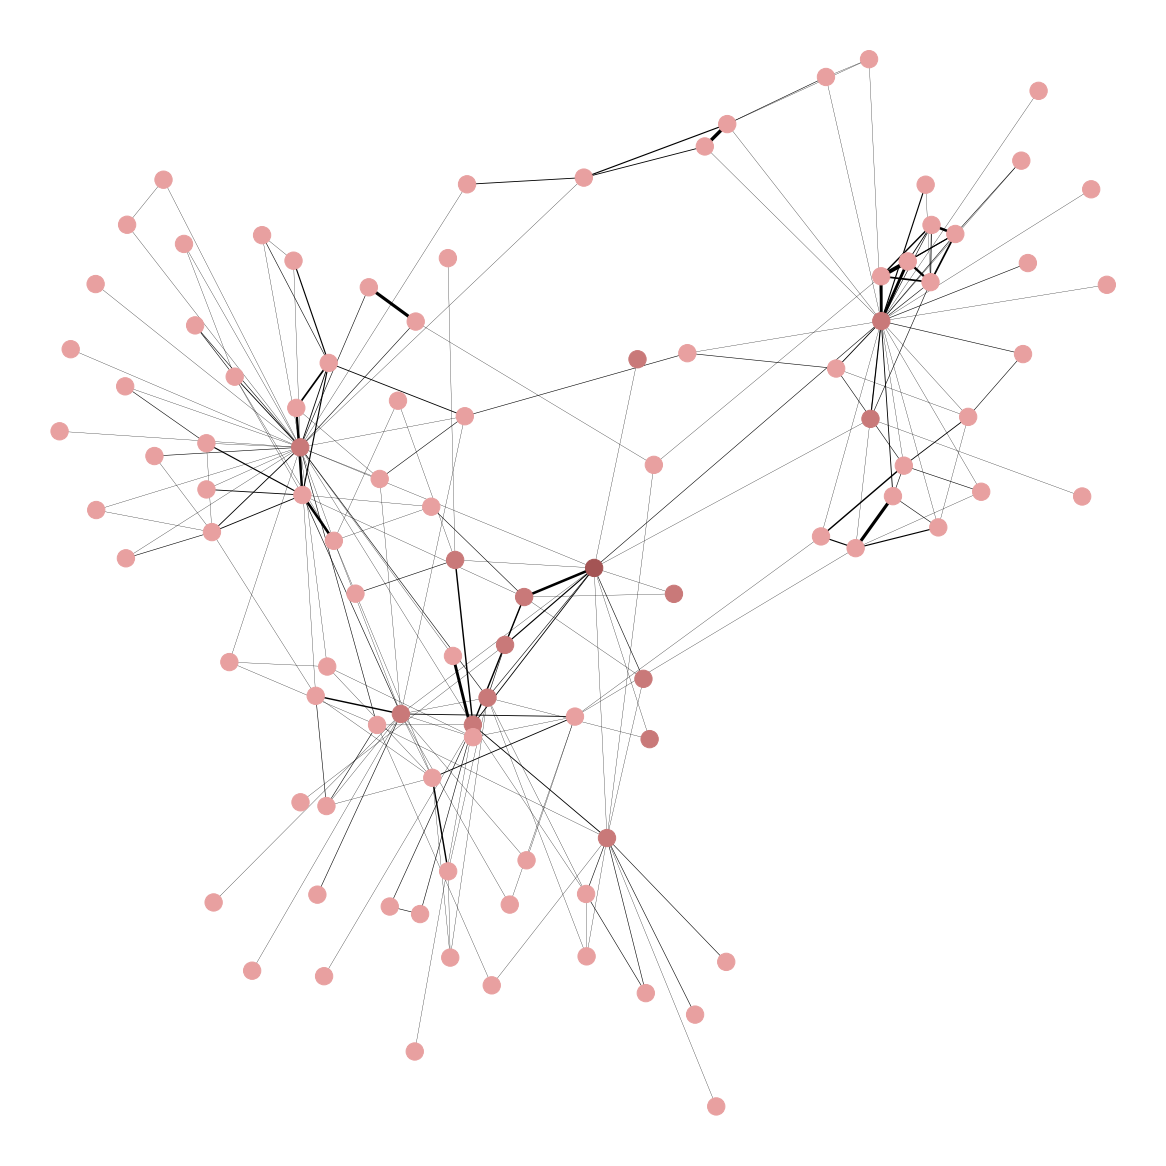

In [69]:
name = 'Hendra Gunawan'

# membuat daftar node untuk subgraph
n0 = [name]
n1 = [n for n in graph.neighbors(name)]
n2 = []
for friend in n1:
    n2.extend(graph.neighbors(friend))
n2 = list(set(n2)-set(n1)-set(n0))


# membuat subgraph
subgraph = nx.Graph(graph.subgraph(n0 + n1 + n2))

# mengatur ukuran edges ketika plotting
widths = [subgraph[i][j]['weight'] for (i,j) in subgraph.edges]
maxw = max(widths)
widths = [4*w/maxw for w in widths]

# mengatur warna node ketika plotting
c0 = '#a45454'
c1 = '#c97979'
c2 = '#e8a0a0'
c3 = '#ffcccc'

col_list = []
for n in subgraph.nodes:
    if n in n2: col_list.append(c2)
    elif n in n1: col_list.append(c1)
    else: col_list.append(c0)

print('banyak orang:', len(subgraph.nodes))
print('persentase  :', len(subgraph.nodes)/len(graph.nodes) * 100)
        
# plotting
plt.figure(figsize=(16,16)) 
nx.draw(subgraph, width=widths, node_color=col_list)
plt.show()

In [70]:
sorted([x for x in subgraph.nodes])

['Achmad Munir',
 'Ade Sjairuddin',
 'Adhe Kania',
 'Adi Pancoro',
 'Adit Kurniawan',
 'Agus Yodi Gunawan',
 'Allya Paramita Koesoema',
 'Andriyan Bayu Suksmono',
 'Asep Kurnia Permadi',
 'Astri Handayani ST.',
 'Barti Setiani Muntalif',
 'Beni Rio Hermanto',
 'Budiman Dabarsyah',
 'Denny Ivanal Hakim',
 'Didit Adytia',
 'Doddy Abdassah',
 'Donny Danudirdjo',
 'Dumaria R. Tampubolon',
 'Dumaria Rulina Tampubolon',
 'Edy Souwono',
 'Efi Fitriana',
 'Elvira Kusniyanti',
 'Endon Bharata',
 'Eri',
 'Eric',
 'Eric -',
 'Eridani',
 'Eueung Mulyana',
 'Fadjar Fathurrahman',
 'Finny Oktariani',
 'Gantina Rachmaputri',
 'H. Sudjati Rachmat',
 'Hanni Garminia Y.',
 'Hasballah Zakaria ST.',
 'Hendra Gunawan',
 'Hendriyawan',
 "Hermawan K. Dipojono\\'",
 'Ian Joseph Matheus Edward',
 'Ikha Magdalena',
 'Indra Djodikusumo -',
 'Iwan Paranoto',
 'Iwan Pratoyo Kusumantoro MT',
 'Jalina Widjaja',
 'Janny Lindiarny',
 'Johan M. Tuwankotta',
 'Johan Matheus Tuwankotta',
 'Joko Suryana',
 'Khreshna I. A.